## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
#1. 
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

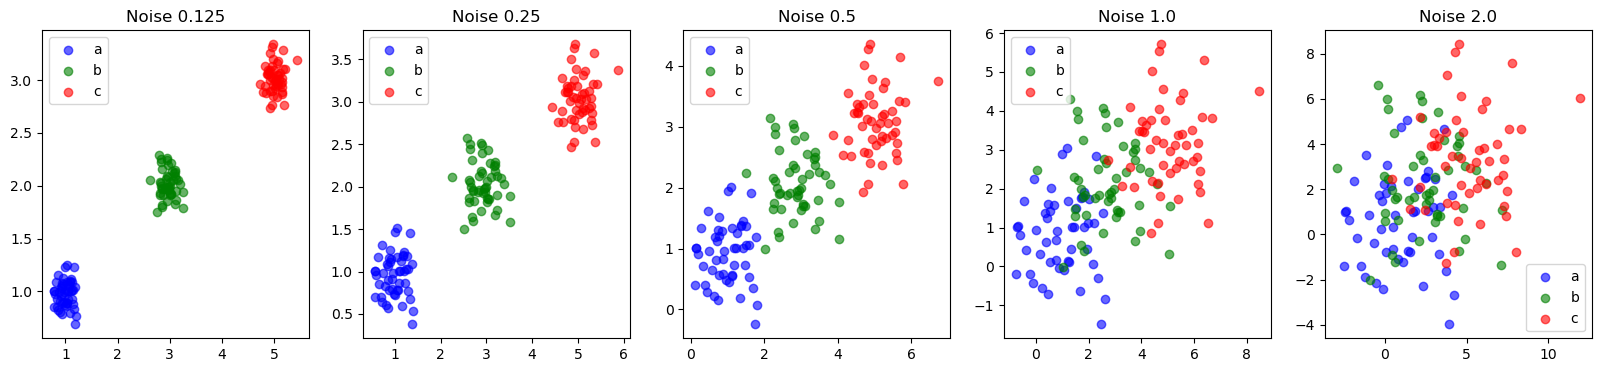

In [7]:
# 2. 
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, (df, title) in zip(axes, [(df0_125, "Noise 0.125"), 
                                  (df0_25, "Noise 0.25"), 
                                  (df0_5, "Noise 0.5"), 
                                  (df1_0, "Noise 1.0"), 
                                  (df2_0, "Noise 2.0")]):
    for label, color in zip(['a', 'b', 'c'], ['blue', 'green', 'red']):
        subset = df[df['group'] == label]
        ax.scatter(subset['x1'], subset['x2'], label=label, color=color, alpha=0.6)
    ax.set_title(title)
    ax.legend()

plt.show()

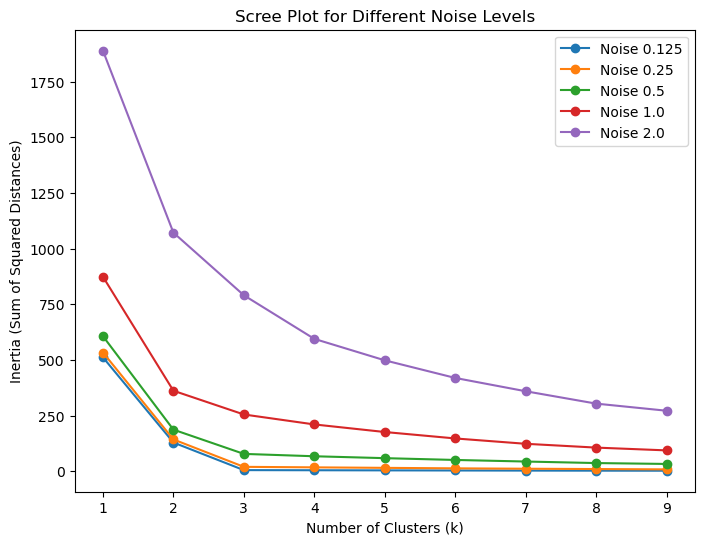

In [9]:
# 3. 
fig, ax = plt.subplots(figsize=(8, 6))

for df, title in [(df0_125, "Noise 0.125"), 
                  (df0_25, "Noise 0.25"), 
                  (df0_5, "Noise 0.5"), 
                  (df1_0, "Noise 1.0"), 
                  (df2_0, "Noise 2.0")]:
    X = df[['x1', 'x2']].values
    inertia = []
    k_range = range(1, 10)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    ax.plot(k_range, inertia, marker='o', label=title)

ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Inertia (Sum of Squared Distances)")
ax.set_title("Scree Plot for Different Noise Levels")
ax.legend()
plt.show()

As noise increases, the scree plot's "elbow" becomes less distinct, making it harder to determine the optimal 𝑘. 
At low noise levels (0.125, 0.25), the elbow at 𝑘 = 3 is clear, indicating well-separated clusters. With moderate noise (0.5, 1.0), the drop in inertia is more gradual, reducing confidence in selecting 𝑘 = 3. At high noise (2.0), the inertia decreases smoothly, suggesting no strong clustering structure and making 𝑘 ambiguous. Overall, higher noise weakens cluster distinction, diminishing the effectiveness of the elbow method.

4. The elbow method helps determine the optimal 𝑘 by identifying where adding more clusters no longer significantly reduces inertia. In this simulation, when noise is low, the scree plot shows a clear elbow at 𝑘 = 3, indicating well-separated clusters. As noise increases, the inertia decreases more gradually, and the elbow becomes less distinct. At very high noise levels, the scree plot lacks a clear elbow, suggesting that no strong clustering structure exists. This demonstrates that the elbow method works best when clusters are well-defined but becomes less useful when data is more dispersed.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [17]:
# 1. # Load the dataset
file_path = "2022 election cycle fundraising.csv"
df = pd.read_csv(file_path)

# Clean financial columns by removing '$' and ',' and converting to numeric
financial_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]
for col in financial_cols:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# To clean the financial data, I removed dollar signs ($) and commas (,) from the Raised, Spent, Cash on 
# Hand, and Debts columns and converted them to numeric values. This ensured that the data could be used 
# for mathematical operations like normalization and clustering. After cleaning, I applied Min-Max scaling 
# to normalize the values, bringing them into a range between 0 and 1 for better comparison in clustering 
# analysis.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

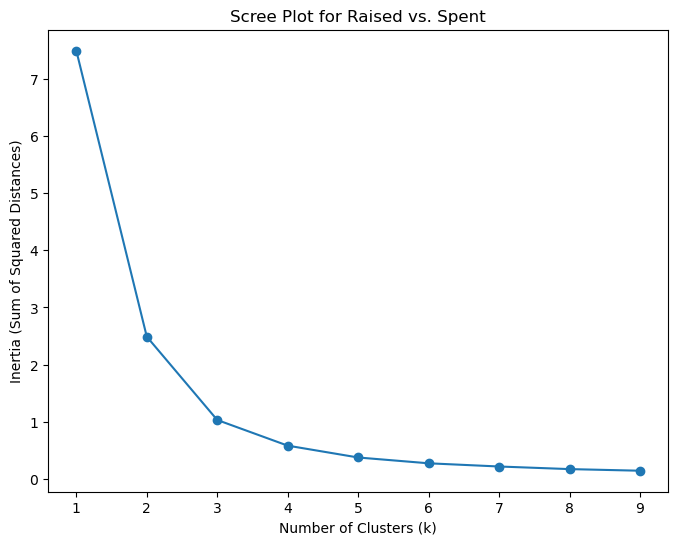

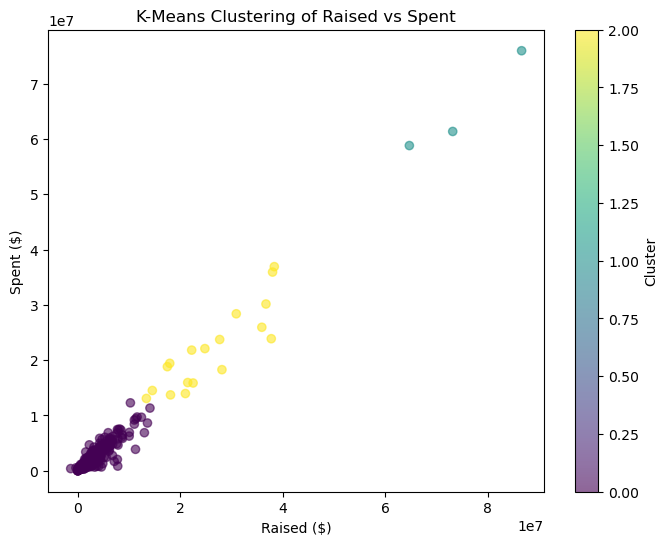

                     Member       Party           State      Raised  \
2               Adam Schiff  Democratic      California  20993041.0   
87   Catherine Cortez Masto  Democratic          Nevada  37993811.0   
89            Chuck Schumer  Democratic        New York  35899966.0   
115            Dan Crenshaw  Republican           Texas  14535870.0   
261            John Kennedy  Republican       Louisiana  28119082.0   
290            Katie Porter  Democratic      California  21441693.0   
298          Kevin McCarthy  Republican      California  24791538.0   
326           Maggie Hassan  Democratic   New Hampshire  30914830.0   
328             Marco Rubio  Republican         Florida  36709285.0   
340              Mark Kelly  Democratic         Arizona  73140886.0   
357          Michael Bennet  Democratic        Colorado  18086343.0   
390            Nancy Pelosi  Democratic      California  22216583.0   
402            Patty Murray  Democratic      Washington  13377243.0   
414   

In [20]:
# 2. 
scaler = MinMaxScaler()
df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df[['Raised', 'Spent']])

inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(df[['Raised_norm', 'Spent_norm']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Scree Plot for Raised vs. Spent")
plt.show()

# Apply K-Means clustering (assuming k=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
df['Cluster_Raised_Spent'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm']])

# Scatter plot of Raised vs Spent with clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Raised'], df['Spent'], c=df['Cluster_Raised_Spent'], cmap='viridis', alpha=0.6)
plt.xlabel("Raised ($)")
plt.ylabel("Spent ($)")
plt.title("K-Means Clustering of Raised vs Spent")
plt.colorbar(label="Cluster")
plt.show()

# Identify politicians in the smallest two clusters
cluster_counts = df['Cluster_Raised_Spent'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index
smallest_cluster_politicians = df[df['Cluster_Raised_Spent'].isin(smallest_clusters)][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cluster_Raised_Spent']]
print(smallest_cluster_politicians)

The scatter plot shows distinct clusters of politicians based on the amount they raised and spent. Most candidates fall into a central cluster, while a smaller group, including Adam Schiff, Catherine Cortez Masto, and Chuck Schumer, raised and spent significantly higher amounts, forming a distinct cluster. Another small cluster may represent candidates with lower fundraising but relatively high spending. This suggests that a few politicians operate with significantly larger campaign finances compared to the majority. 

The smallest two clusters include politicians such as Adam Schiff (D - CA), Catherine Cortez Masto (D - NV), Chuck Schumer (D - NY), Dan Crenshaw (R - TX), and John Kennedy (R - LA). These politicians raised and spent significantly high amounts, placing them in distinct clusters.

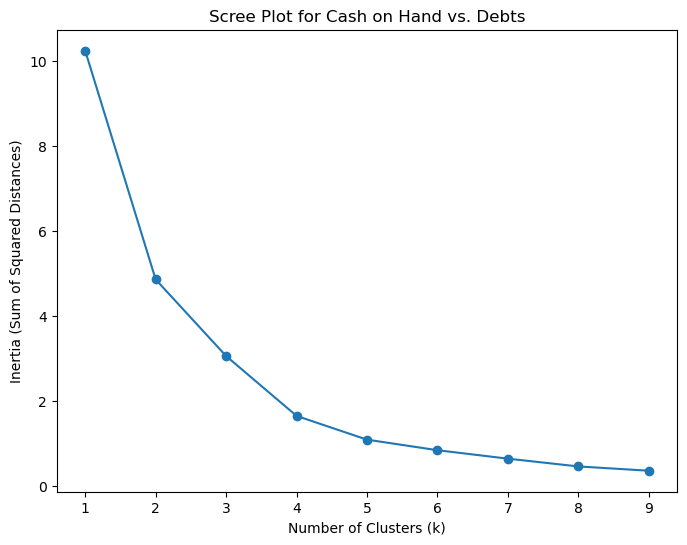

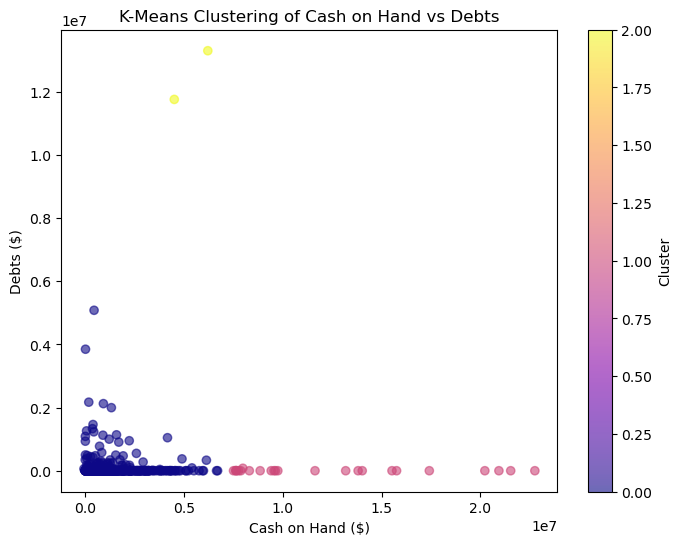

                  Member        Party           State  Cash on Hand  \
2            Adam Schiff   Democratic      California    20942888.0   
11          Alex Padilla   Democratic      California     7617654.0   
45        Bernie Sanders  Independent         Vermont     9751125.0   
89         Chuck Schumer   Democratic        New York    20231213.0   
112          Cory Booker   Democratic      New Jersey     7671026.0   
133          David Trone   Democratic        Maryland     6206371.0   
239           Jim Jordan   Republican            Ohio     8855217.0   
247          Joe Manchin   Democratic   West Virginia     9414431.0   
261         John Kennedy   Republican       Louisiana    15530074.0   
267           John Thune   Republican    South Dakota    17419927.0   
274      Josh Gottheimer   Democratic      New Jersey    14024163.0   
290         Katie Porter   Democratic      California    15762568.0   
298       Kevin McCarthy   Republican      California     7507326.0   
303   

In [21]:
# 3. 
df[['Cash_norm', 'Debts_norm']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(df[['Cash_norm', 'Debts_norm']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Scree Plot for Cash on Hand vs. Debts")
plt.show()

# Apply K-Means clustering
optimal_k_cash_debts = 3
kmeans = KMeans(n_clusters=optimal_k_cash_debts, random_state=100, n_init=10)
df['Cluster_Cash_Debts'] = kmeans.fit_predict(df[['Cash_norm', 'Debts_norm']])

# Scatter plot for Cash on Hand vs Debts
plt.figure(figsize=(8, 6))
plt.scatter(df['Cash on Hand'], df['Debts'], c=df['Cluster_Cash_Debts'], cmap='plasma', alpha=0.6)
plt.xlabel("Cash on Hand ($)")
plt.ylabel("Debts ($)")
plt.title("K-Means Clustering of Cash on Hand vs Debts")
plt.colorbar(label="Cluster")
plt.show()

# Identify politicians in the smallest two clusters
cluster_counts_cash_debts = df['Cluster_Cash_Debts'].value_counts()
smallest_clusters_cash_debts = cluster_counts_cash_debts.nsmallest(2).index
smallest_cluster_politicians_cash_debts = df[df['Cluster_Cash_Debts'].isin(smallest_clusters_cash_debts)][['Member', 'Party', 'State', 'Cash on Hand', 'Debts', 'Cluster_Cash_Debts']]
print(smallest_cluster_politicians_cash_debts)

The clustering results for Cash on Hand vs. Debts show some similarities to those for Raised vs. Spent, but with key differences. In both cases, high-profile politicians like Adam Schiff, Chuck Schumer, and Bernie Sanders form a distinct small cluster, indicating their financial dominance. However, the Cash on Hand vs. Debts clustering highlights candidates with large reserves of cash but little to no debt, rather than just high fundraising and spending.

The differences might arise because Raised and Spent reflect a candidate’s ability to fundraise and their campaign spending strategy, whereas Cash on Hand and Debts indicate financial sustainability and leftover funds. Some politicians, despite raising and spending large amounts, maintain significant cash reserves, while others might have little cash left due to high expenditures.

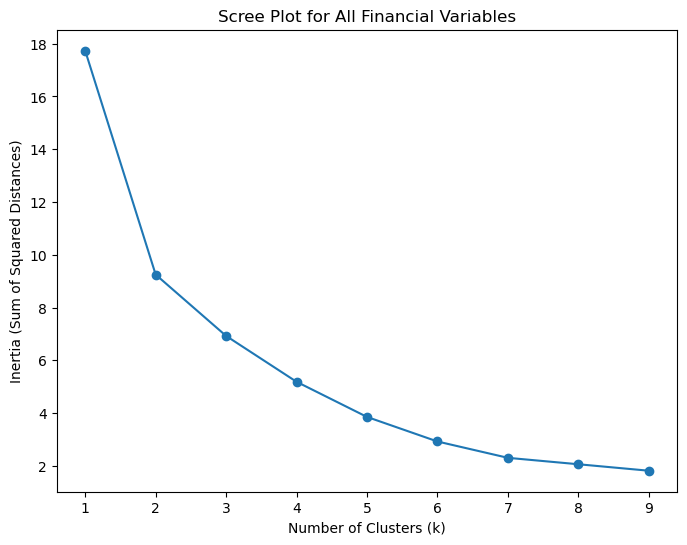

                       Member        Party           State      Raised  \
2                 Adam Schiff   Democratic      California  20993041.0   
11               Alex Padilla   Democratic      California  11253771.0   
12   Alexandria Ocasio-Cortez   Democratic        New York  11326505.0   
45             Bernie Sanders  Independent         Vermont  14074831.0   
87     Catherine Cortez Masto   Democratic          Nevada  37993811.0   
89              Chuck Schumer   Democratic        New York  35899966.0   
112               Cory Booker   Democratic      New Jersey   5794554.0   
133               David Trone   Democratic        Maryland  12990741.0   
239                Jim Jordan   Republican            Ohio  12417107.0   
247               Joe Manchin   Democratic   West Virginia   7790164.0   
261              John Kennedy   Republican       Louisiana  28119082.0   
267                John Thune   Republican    South Dakota   6770674.0   
274           Josh Gottheimer   Democr

In [22]:
# 4.
df[['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(df[['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Scree Plot for All Financial Variables")
plt.show()

# Apply K-Means clustering
optimal_k_all_vars = 3
kmeans = KMeans(n_clusters=optimal_k_all_vars, random_state=100, n_init=10)
df['Cluster_All_Variables'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']])

# Identify politicians in the smallest two clusters
cluster_counts_all_vars = df['Cluster_All_Variables'].value_counts()
smallest_clusters_all_vars = cluster_counts_all_vars.nsmallest(2).index
smallest_cluster_politicians_all_vars = df[df['Cluster_All_Variables'].isin(smallest_clusters_all_vars)][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster_All_Variables']]
print(smallest_cluster_politicians_all_vars)

Clustering with all four financial variables provides a more comprehensive grouping than analyzing Raised vs. Spent or Cash on Hand vs. Debts separately. High-profile candidates like Adam Schiff, Bernie Sanders, and Alexandria Ocasio-Cortez consistently appear in distinct clusters, indicating their strong financial positions across multiple metrics. While Raised vs. Spent highlighted big fundraisers and spenders, and Cash on Hand vs. Debts identified financially stable candidates, combining all variables captures both spending habits and overall financial health, offering a more complete picture of campaign financing.

5. Yes, the K-means clustering algorithm effectively identified meaningful patterns in the election fundraising data. By analyzing variables such as Raised, Spent, Cash on Hand, and Debts, the algorithm grouped candidates with similar financial behaviors. Notably, high-profile politicians like Adam Schiff, Bernie Sanders, and Alexandria Ocasio-Cortez consistently formed distinct clusters, reflecting their substantial fundraising and spending activities. This clustering approach provided valuable insights into the financial strategies of different candidates, highlighting those with significant financial influence in their campaigns.